In [9]:
import pandas as pd

# 读取数据文件
file_2022_transport = './mnt/data/2022年旅客运输量月度数据.csv'
file_2022_turnover = './mnt/data/2022年旅客周转量月度数据.csv'
file_2023_transport = './mnt/data/2023年旅客运输量月度数据.csv'
file_2023_turnover = './mnt/data/2023年旅客周转量月度数据.csv'

# 使用GBK编码读取CSV文件
data_2022_transport = pd.read_csv(file_2022_transport, encoding='gbk')
data_2022_turnover = pd.read_csv(file_2022_turnover, encoding='gbk')
data_2023_transport = pd.read_csv(file_2023_transport, encoding='gbk')
data_2023_turnover = pd.read_csv(file_2023_turnover, encoding='gbk')

# 移除不必要的列
data_2022_transport_cleaned = data_2022_transport.drop(columns=[col for col in data_2022_transport.columns if "Unnamed" in col])
data_2022_turnover_cleaned = data_2022_turnover.drop(columns=[col for col in data_2022_turnover.columns if "Unnamed" in col])
data_2023_transport_cleaned = data_2023_transport.drop(columns=[col for col in data_2023_transport.columns if "Unnamed" in col])
data_2023_turnover_cleaned = data_2023_turnover.drop(columns=[col for col in data_2023_turnover.columns if "Unnamed" in col])

# 重新命名列名为英文
def rename_columns(df):
    df.columns = ['Metric'] + [f'{month}月' for month in range(12, 0, -1)]
    return df

data_2022_transport_cleaned = rename_columns(data_2022_transport_cleaned)
data_2022_turnover_cleaned = rename_columns(data_2022_turnover_cleaned)
data_2023_transport_cleaned = rename_columns(data_2023_transport_cleaned)
data_2023_turnover_cleaned = rename_columns(data_2023_turnover_cleaned)

# 展示清洗后的数据
data_2022_transport_cleaned.head(), data_2022_turnover_cleaned.head(), data_2023_transport_cleaned.head(), data_2023_turnover_cleaned.head()


(         Metric       12月       11月       10月        9月        8月        7月  \
 0    客运量当期值(万人)   36123.0   33481.0   42794.0   48413.0   59623.0   61900.0   
 1    客运量累计值(万人)  558738.0  522618.0  489136.0  446342.0  397640.0  338017.0   
 2    客运量同比增长(%)     -37.3     -38.0     -41.2     -28.7       8.6     -25.8   
 3    客运量累计增长(%)     -32.7     -32.4     -32.0     -30.9     -31.2     -35.5   
 4  铁路客运量当期值(万人)    9913.0    7374.0   11896.0   14752.0   21732.0   22615.0   
 
          6月        5月        4月        3月        2月       1月  
 0   51605.0   37782.0   32506.0   42108.0   56582.0  55534.0  
 1  276117.0  224512.0  186730.0  154224.0  112116.0  55534.0  
 2     -31.4     -55.5     -59.7     -43.5      -1.3    -17.3  
 3     -37.2     -38.4     -33.2     -22.5      -9.9    -17.3  
 4   16736.0    9225.0    5691.0   10145.0   19052.0  17874.0  ,
              Metric       12月       11月       10月        9月       8月       7月  \
 0    旅客周转量当期值(亿人公里)    868.21    639.64    868.01 

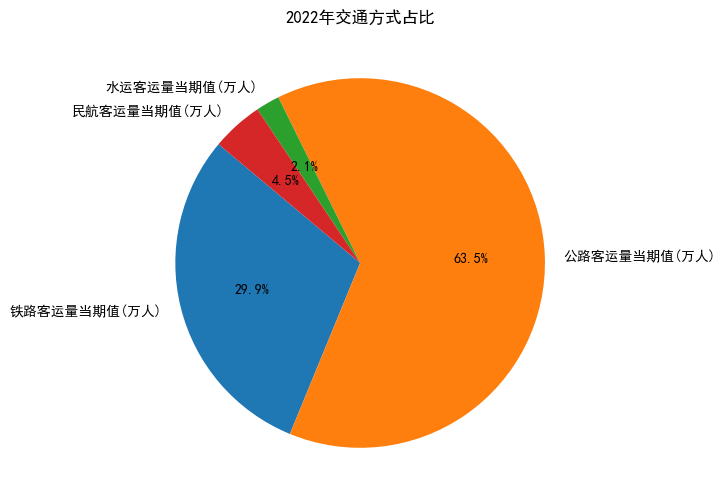

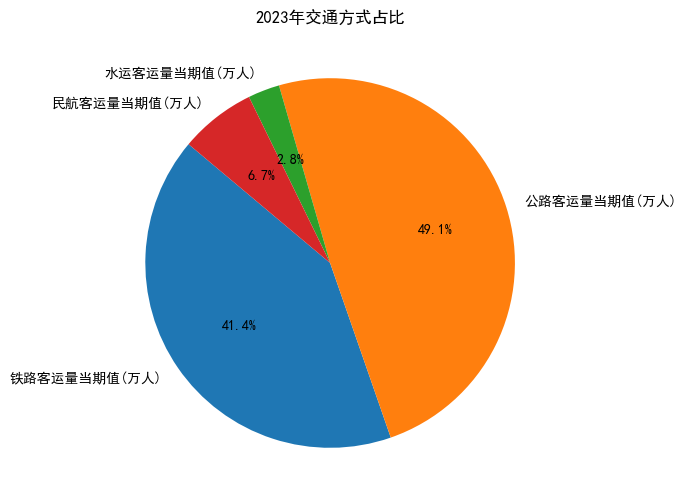

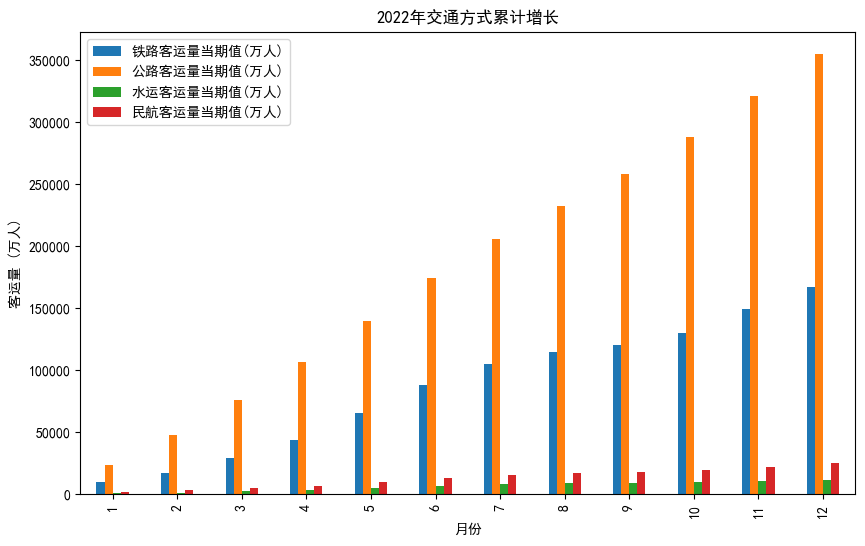

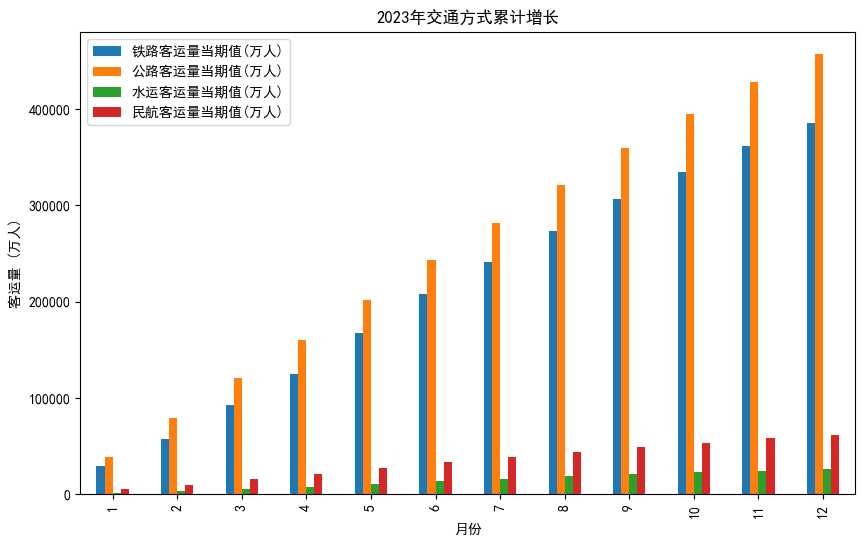

In [10]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.rcParams['font.family'] = 'SimHei'  

# 提取交通方式数据
def extract_transport_modes(df):
    transport_modes = ['铁路客运量当期值(万人)', '公路客运量当期值(万人)', '水运客运量当期值(万人)', '民航客运量当期值(万人)']
    mode_data = df[df['Metric'].isin(transport_modes)].set_index('Metric').T
    mode_data.index = range(1, 13)
    return mode_data

def plot_pie_chart(data, title, filename):
    total = data.sum()
    percentages = data / total * 100
    plt.figure(figsize=(8, 6))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

def plot_bar_chart(data, title, filename):
    data.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.ylabel('客运量 (万人)')
    plt.xlabel('月份')
    plt.legend(loc='best')
    plt.savefig(filename)
    plt.show()

# 提取并绘制2022年和2023年数据
data_2022_modes = extract_transport_modes(data_2022_transport_cleaned)
data_2023_modes = extract_transport_modes(data_2023_transport_cleaned)

# 2022年交通方式占比饼图
total_2022 = data_2022_modes.sum()
plot_pie_chart(total_2022, '2022年交通方式占比', '2022_transport_modes_pie.png')

# 2023年交通方式占比饼图
total_2023 = data_2023_modes.sum()
plot_pie_chart(total_2023, '2023年交通方式占比', '2023_transport_modes_pie.png')

# 2022年交通方式累计增长柱状图
plot_bar_chart(data_2022_modes.cumsum(), '2022年交通方式累计增长', '2022_transport_modes_bar.png')

# 2023年交通方式累计增长柱状图
plot_bar_chart(data_2023_modes.cumsum(), '2023年交通方式累计增长', '2023_transport_modes_bar.png')


In [11]:

# 提取每个月的客流量
def extract_monthly_passenger_volume(df):
    monthly_data = df[df['Metric'] == '客运量当期值(万人)'].set_index('Metric').T
    monthly_data.columns = ['客运量']
    monthly_data.index = range(1, 13)
    return monthly_data

monthly_data_2022 = extract_monthly_passenger_volume(data_2022_transport_cleaned)
monthly_data_2023 = extract_monthly_passenger_volume(data_2023_transport_cleaned)

# 计算总和
monthly_totals_2022 = monthly_data_2022.sum(axis=1)
monthly_totals_2023 = monthly_data_2023.sum(axis=1)

# 合并2022年和2023年的数据
monthly_totals = monthly_totals_2022 + monthly_totals_2023

# 识别爆发期
explosive_months = monthly_totals.sort_values(ascending=False).head(3)
print("爆发期月份及其客流量总和:")
print(explosive_months)


爆发期月份及其客流量总和:
5    154097.0
6    152893.0
7    130678.0
dtype: float64


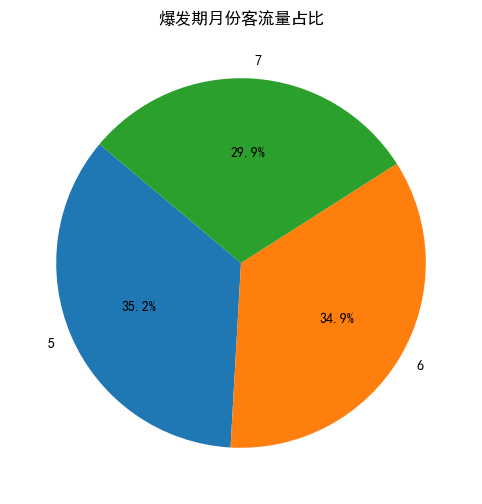

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


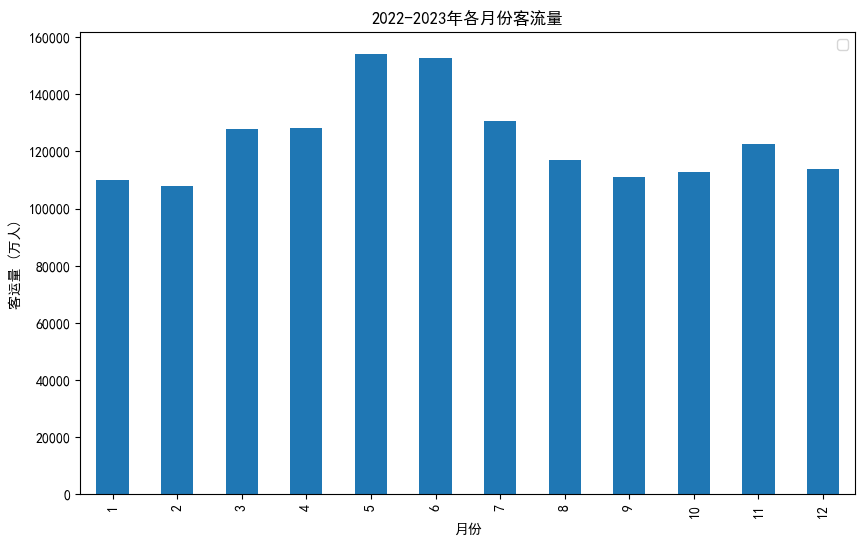

In [12]:

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei' 

# 绘制爆发期月份的饼图
def plot_explosive_pie_chart(data, title, filename):
    plt.figure(figsize=(8, 6))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

plot_explosive_pie_chart(explosive_months, '爆发期月份客流量占比', 'explosive_months_pie.png')

# 绘制客流量的月度变化柱状图
def plot_monthly_passenger_volume(data, title, filename):
    data.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.ylabel('客运量 (万人)')
    plt.xlabel('月份')
    plt.legend(loc='best')
    plt.savefig(filename)
    plt.show()

plot_monthly_passenger_volume(monthly_totals, '2022-2023年各月份客流量', 'monthly_passenger_volume.png')


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 准备数据
def prepare_data(df):
    df = df.set_index('Metric').T
    df.index = range(1, 13)
    return df

# 训练集和测试集
X_train = prepare_data(data_2022_transport_cleaned).drop(columns=['铁路客运量当期值(万人)', '公路客运量当期值(万人)', '水运客运量当期值(万人)', '民航客运量当期值(万人)'])
y_train = prepare_data(data_2022_transport_cleaned)[['铁路客运量当期值(万人)', '公路客运量当期值(万人)', '水运客运量当期值(万人)', '民航客运量当期值(万人)']]
X_test = prepare_data(data_2023_transport_cleaned).drop(columns=['铁路客运量当期值(万人)', '公路客运量当期值(万人)', '水运客运量当期值(万人)', '民航客运量当期值(万人)'])
y_test = prepare_data(data_2023_transport_cleaned)[['铁路客运量当期值(万人)', '公路客运量当期值(万人)', '水运客运量当期值(万人)', '民航客运量当期值(万人)']]

# 训练模型
models = {}
predictions = {}
metrics = {}

for mode in y_train.columns:
    model = LinearRegression()
    model.fit(X_train, y_train[mode])
    models[mode] = model
    predictions[mode] = model.predict(X_test)
    metrics[mode] = {
        "MAE": mean_absolute_error(y_test[mode], predictions[mode]),
        "MSE": mean_squared_error(y_test[mode], predictions[mode]),
        "R2": r2_score(y_test[mode], predictions[mode])
    }

# 显示模型的评估结果
metrics_df = pd.DataFrame(metrics)
print("模型预测结果及性能评估")
print(metrics_df)

# 展示预测结果与真实值对比
comparison = pd.DataFrame(predictions, index=y_test.index)
comparison.columns = [f"预测_{col}" for col in comparison.columns]
comparison = pd.concat([y_test.reset_index(drop=True), comparison], axis=1)

print("模型预测结果与真实值对比")
print(comparison)


模型预测结果及性能评估
     铁路客运量当期值(万人)  公路客运量当期值(万人)  水运客运量当期值(万人)  民航客运量当期值(万人)
MAE  3.063311e+03  4.142784e+03  2.254115e+03  1.084487e+03
MSE  1.254360e+07  2.451966e+07  8.108747e+06  2.139215e+06
R2   5.607729e-01 -8.681629e-01 -1.923681e+01 -3.654016e+00
模型预测结果与真实值对比
    铁路客运量当期值(万人)  公路客运量当期值(万人)  水运客运量当期值(万人)  民航客运量当期值(万人)  预测_铁路客运量当期值(万人)  \
0        28986.0       38640.0        1280.0        5059.0              NaN   
1        27974.0       39967.0        1655.0        4899.0     30210.015124   
2        35169.0       41888.0        2520.0        5605.0     32267.037590   
3        32499.0       39980.0        1902.0        5349.0     36614.924803   
4        42860.0       41625.0        3593.0        6396.0     31859.643835   
5        40919.0       40798.0        3034.0        6243.0     38303.446256   
6        32682.0       39041.0        2039.0        5312.0     36332.350956   
7        32560.0       39141.0        2453.0        5170.0     29847.991027   
8        32900.0       3

In [14]:
# 使用已训练的模型预测2024年的运输客流量
# 假设2024年的月份特征与2023年相同
X_2024 = X_test.copy()
X_2024.index = range(1, 13)

predictions_2024 = {}
for mode, model in models.items():
    predictions_2024[mode] = model.predict(X_2024)

# 创建预测结果的DataFrame
predictions_2024_df = pd.DataFrame(predictions_2024, index=X_2024.index)
predictions_2024_df.columns = [f"预测_2024_{col}" for col in predictions_2024_df.columns]

print("2024年运输客流量预测结果")
print(predictions_2024_df)

# 将预测结果与2023年的真实值进行对比
comparison_2024 = pd.concat([predictions_2024_df, y_test.reset_index(drop=True)], axis=1)
comparison_2024.columns = [col.replace('预测_', '') for col in comparison_2024.columns]

print("2024年预测结果与2023年真实值对比")
print(comparison_2024)


2024年运输客流量预测结果
    预测_2024_铁路客运量当期值(万人)  预测_2024_公路客运量当期值(万人)  预测_2024_水运客运量当期值(万人)  \
1           30210.015124          34499.874424           5053.368480   
2           32267.037590          29750.306747           7375.339121   
3           36614.924803          34610.809878           7033.718688   
4           31859.643835          36339.542902           5315.051563   
5           38303.446256          43006.965613           6691.845258   
6           36332.350956          43985.868716           3908.929734   
7           29847.991027          41023.746441            848.920589   
8           31206.124930          39754.576885            191.482489   
9           35074.914006          34053.645395           1488.074827   
10          25999.513718          37370.926248           1592.412325   
11          21731.082864          37690.113817           2096.600456   
12          17562.009063          35830.386759            723.584524   

    预测_2024_民航客运量当期值(万人)  
1            4191.944

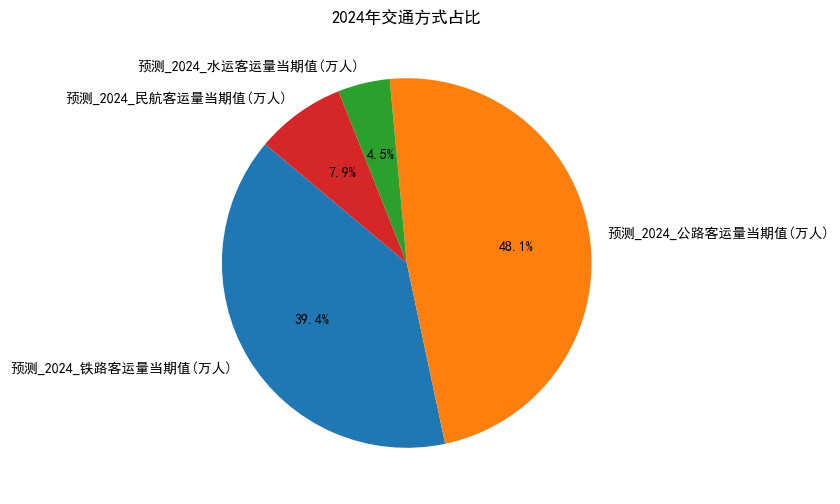

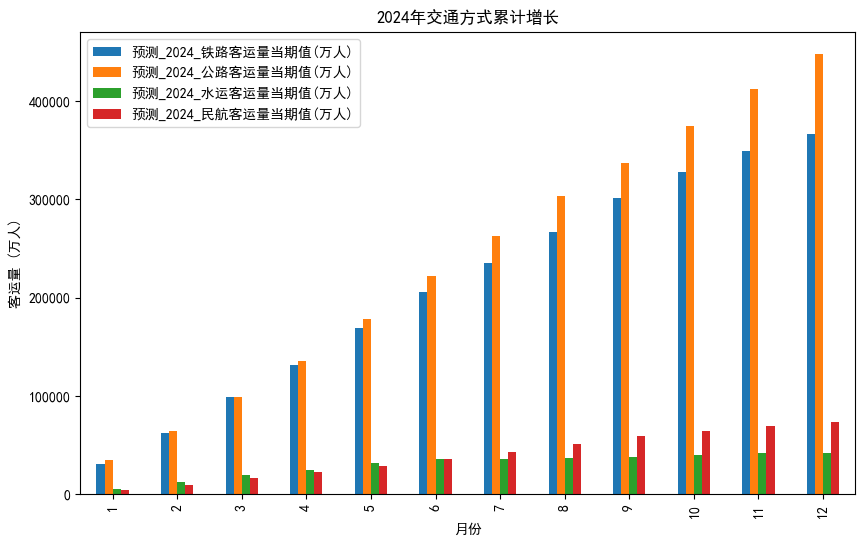

In [15]:
# 2024年交通方式占比饼图
total_2024 = predictions_2024_df.sum()
plot_pie_chart(total_2024, '2024年交通方式占比', '2024_transport_modes_pie.png')

# 2024年交通方式累计增长柱状图
plot_bar_chart(predictions_2024_df.cumsum(), '2024年交通方式累计增长', '2024_transport_modes_bar.png')
